In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [19]:
df = pd.read_csv("../simulation_results.csv", sep=',', 
                  names=["Patient ID", "CTAS Level", 
                         "Arrival Time", "Departure Time", "LOS",
                         "Triage Waiting Time", "ED Waiting Time",
                         "Medication Waiting Time", "Inpatient Waiting Time", 
                         "Triage Waiting Room Length", "ED Waiting Room Length",
                         "Medication Waiting Room Length", "Inpatient Waiting Room Length"
                        ])

In [20]:
df[1000:1010]

,Patient ID,CTAS Level,Arrival Time,Departure Time,LOS,Triage Waiting Time,ED Waiting Time,Medication Waiting Time,Inpatient Waiting Time,Triage Waiting Room Length,ED Waiting Room Length,Medication Waiting Room Length,Inpatient Waiting Room Length
1000,1001,3,695.291677,791.531226,96.239549,0.0,0.0,2.209182,0.0,1,1,10,1
1001,1002,1,697.083981,709.014416,11.930435,0.0,0.0,0.000000,0.0,1,1,10,1
1002,1003,3,697.594212,738.243612,40.649400,0.0,0.0,2.258365,0.0,1,1,10,1
1003,1004,4,697.719198,727.966288,30.247090,0.0,0.0,1.668191,0.0,1,1,10,1
1004,1005,1,698.322116,706.197514,7.875398,0.0,0.0,0.000000,0.0,1,1,10,1
1005,1006,5,699.841269,772.509392,72.668123,0.0,0.0,2.043895,0.0,1,1,10,1
1006,1007,2,700.466436,795.473462,95.007026,0.0,0.0,2.527475,0.0,1,1,10,1
1007,1008,0,702.015047,0.000000,-702.015047,0.0,0.0,0.000000,0.0,1,1,10,1
1008,1009,2,702.234396,731.920765,29.686369,0.0,0.0,2.479475,0.0,1,1,10,1
1009,1010,0,703.629420,0.000000,-703.629420,0.0,0.0,0.000000,0.0,1,1,10,1


In [21]:
los_vals = []
for items in df["LOS"]:
    if items > 0:
        los_vals.append(items)
        
print(len(los_vals))

52795


In [22]:
# los_vals.sort()
# print(los_vals)

In [23]:
print(min(los_vals), max(los_vals))

6.768449116136253 153.80086670893797


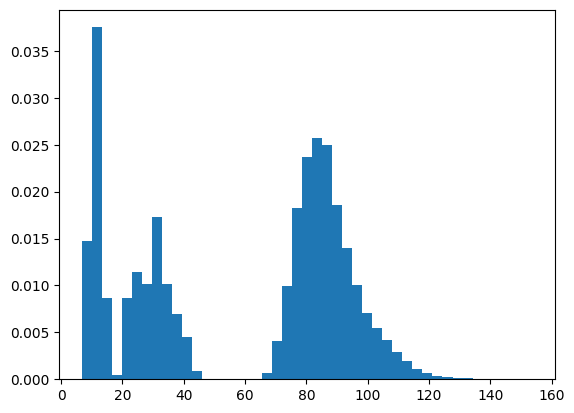

In [24]:
plt.hist(los_vals, density=True, bins="auto")
plt.show()

In [25]:
los_vals_ctas_i_iii = []
los_vals_ctas_iv_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) in [1, 2, 3]:
            los_vals_ctas_i_iii.append(los)
        elif int(ctas) in [4, 5]:
            los_vals_ctas_iv_v.append(los)
        
print(len(los_vals_ctas_i_iii), len(los_vals_ctas_iv_v))

35270 17525


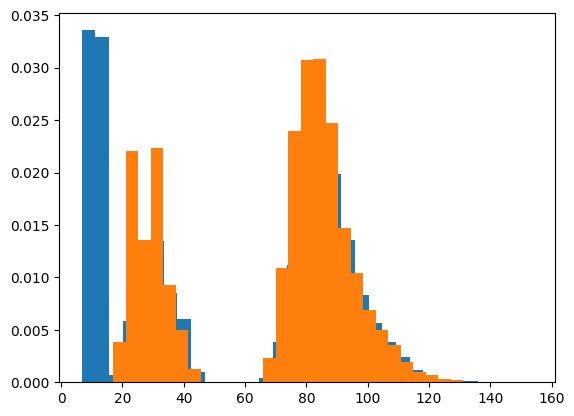

In [26]:
plt.hist(los_vals_ctas_i_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv_v, density=True, bins="auto")
plt.show()

In [27]:
los_vals = [x/60 for x in los_vals]
ecdf = sm.distributions.ECDF(los_vals)

In [28]:
x = np.linspace(min(los_vals), max(los_vals), num=len(los_vals))
# Evaluate the CDF at each x-value
y = ecdf(x)

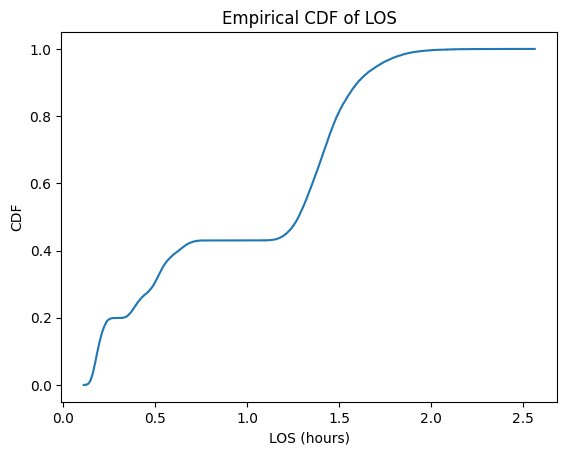

In [29]:
plt.step(x, y)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()